In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math as math
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

In [9]:
dataset = pd.read_csv("data_EtOH_Final.csv")
print(dataset.shape)
dataset.head()

(779, 163)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,50.731606,50.731606,351.19888,1.840787,-0.055960,A-paPhos,InChI=1S/C20H20NP/c1-21(2)17-13-15-20(16-14-17...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,80.673770,61.935337,479.46484,1.803143,-0.058457,CX-FBu,InChI=1S/C29H39P.BF4/c1-2-3-22-29(27-20-12-10-...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,107.755370,56.694310,386.44120,1.805810,-0.058387,CX-PCy,InChI=1S/C22H30NP/c1-4-11-19(12-5-1)23-18-10-1...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,117.597336,54.091050,618.03375,1.817123,-0.054418,Cy-BippyPhos,InChI=1S/C36H39N4P/c1-6-16-28(17-7-1)34-36(35(...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,111.484024,57.033180,402.37967,1.816461,-0.061351,Cy-JohnPhos,InChI=1S/C24H31P/c1-4-12-20(13-5-1)23-18-10-11...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",80.44


### Prepare Hold-out Electrophiles Testing Set¶

In [3]:
dataset.Electrophile.unique().tolist()

['1H-indol-5-yl\xa0N,N-dimethylsulfamate',
 "2-bromo-1,1'-biphenyl",
 '2-Chloro-5-fluorotoluene',
 '2-Chloro-m-xylene',
 '(2-Methyl-1,3-benzothiazol-5-yl)\xa0N,N-dimethylsulfamate',
 '3-Bromothiophene',
 '3-Chloro-2-methylaniline',
 '4-Bromoanisole',
 '4-Bromobenzotrifluoride',
 '4-Chloro-N,N-dimethylbenzamide',
 '5-chloroindole',
 'BMS-929356',
 'Ethyl\xa04-chloro-3-fluorobenzoate',
 'methyl\xa04-bromobenzoate',
 'quinolin-6-yl dimethylsulfamate',
 '3-Bromoquinoline',
 '3-bromo-2-methylpyridine',
 'Clofibrate',
 '4-Bromo-2-fluoroanisole',
 '4-Bromo-2-fluorobenzonitrile',
 '(4-Phenylphenyl) N,N-dimethylsulfamate',
 '4-Bromo-1,2-(methylenedioxy)benzene',
 '5-Bromobenzofuran',
 '4-chloro-1-fluoro-2-methoxybenzene',
 '4-chlorobenzotrifluoride',
 '3-chloroquinoline',
 '5-bromo-2,4-dimethoxypyrimidine',
 'methyl\xa04-chlorobenzoate',
 '5-Chloro-1,3-benzodioxole',
 '4-chloro-2-fluoro-1-methoxybenzene',
 '4-Chloro-2-fluoroanisole',
 '4-Chlorobiphenyl',
 '4-Bromobiphenyl',
 '4-Chloro-2-fluorob

In [4]:
#Retrieve the three electrophiles and store the features in a separate dataframe 
indices=[0,12,17]

In [5]:
mapped = map(dataset.Electrophile.unique().tolist().__getitem__, indices)
mapped

In [7]:
external_list=list(mapped)
external_list

['1H-indol-5-yl\xa0N,N-dimethylsulfamate',
 'Ethyl\xa04-chloro-3-fluorobenzoate',
 'Clofibrate']

In [15]:
ML_data_validation = dataset[dataset['Electrophile'].isin(external_list)]
print(ML_data_validation.shape)
ML_data_validation.head()

(69, 163)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,50.731606,50.731606,351.19888,1.840787,-0.055960,A-paPhos,InChI=1S/C20H20NP/c1-21(2)17-13-15-20(16-14-17...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,80.673770,61.935337,479.46484,1.803143,-0.058457,CX-FBu,InChI=1S/C29H39P.BF4/c1-2-3-22-29(27-20-12-10-...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,107.755370,56.694310,386.44120,1.805810,-0.058387,CX-PCy,InChI=1S/C22H30NP/c1-4-11-19(12-5-1)23-18-10-1...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,117.597336,54.091050,618.03375,1.817123,-0.054418,Cy-BippyPhos,InChI=1S/C36H39N4P/c1-6-16-28(17-7-1)34-36(35(...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,111.484024,57.033180,402.37967,1.816461,-0.061351,Cy-JohnPhos,InChI=1S/C24H31P/c1-4-12-20(13-5-1)23-18-10-11...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",80.44


In [12]:
ML_data_validation2 = ML_data_validation.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_validation2.shape)
ML_data_validation2.head()

(69, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,44.561430,72.197180,0.212085,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,80.44


In [17]:
#Keep the rest of the dataset for model training purpose
exclude_list = ML_data_validation.index.values.tolist()
ML_data_traintest = dataset[~dataset.index.isin(exclude_list)]
ML_data_traintest

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
23,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.9570,...,50.731606,50.731606,351.19888,1.840787,-0.055960,A-paPhos,InChI=1S/C20H20NP/c1-21(2)17-13-15-20(16-14-17...,InChI=1S/C12H11BO2/c14-13(15)12-9-5-4-8-11(12)...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",79.290
24,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.9570,...,80.673770,61.935337,479.46484,1.803143,-0.058457,CX-FBu,InChI=1S/C29H39P.BF4/c1-2-3-22-29(27-20-12-10-...,InChI=1S/C12H11BO2/c14-13(15)12-9-5-4-8-11(12)...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",15.445
25,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.9570,...,107.755370,56.694310,386.44120,1.805810,-0.058387,CX-PCy,InChI=1S/C22H30NP/c1-4-11-19(12-5-1)23-18-10-1...,InChI=1S/C12H11BO2/c14-13(15)12-9-5-4-8-11(12)...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",54.590
26,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.9570,...,117.597336,54.091050,618.03375,1.817123,-0.054418,Cy-BippyPhos,InChI=1S/C36H39N4P/c1-6-16-28(17-7-1)34-36(35(...,InChI=1S/C12H11BO2/c14-13(15)12-9-5-4-8-11(12)...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",51.530
27,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.9570,...,111.484024,57.033180,402.37967,1.816461,-0.061351,Cy-JohnPhos,InChI=1S/C24H31P/c1-4-12-20(13-5-1)23-18-10-11...,InChI=1S/C12H11BO2/c14-13(15)12-9-5-4-8-11(12)...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",45.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1.18,141.660,0.201,7.568,-0.058,118.217,111.807,-0.222,-0.326,13.6585,...,71.528370,54.244800,325.64120,1.796642,-0.066835,PCy3 HBF4,InChI=1S/C18H33P.BF4/c1-4-10-16(11-5-1)19(17-1...,InChI=1S/C7H5BFNO2/c9-7-3-6(8(11)12)2-1-5(7)4-...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",23.260
775,1.18,141.660,0.201,7.568,-0.058,118.217,111.807,-0.222,-0.326,13.6585,...,95.809050,43.539967,258.78223,1.798675,-0.061648,PnBu3 HBF4,InChI=1S/C12H27P.BF4/c1-4-7-10-13(11-8-5-2)12-...,InChI=1S/C7H5BFNO2/c9-7-3-6(8(11)12)2-1-5(7)4-...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",45.040
776,1.18,141.660,0.201,7.568,-0.058,118.217,111.807,-0.222,-0.326,13.6585,...,107.247060,60.839230,452.11267,1.830797,-0.065696,Cy-vBRIDP,InChI=1S/C27H35P/c1-22(27(23-14-6-2-7-15-23)24...,InChI=1S/C7H5BFNO2/c9-7-3-6(8(11)12)2-1-5(7)4-...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",64.540
777,1.18,141.660,0.201,7.568,-0.058,118.217,111.807,-0.222,-0.326,13.6585,...,65.132670,59.366592,386.75310,1.857948,-0.066832,P(o-Anis)3,InChI=1S/C21H21O3P/c1-22-16-10-4-7-13-19(16)25...,InChI=1S/C7H5BFNO2/c9-7-3-6(8(11)12)2-1-5(7)4-...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",44.590


In [16]:
ML_data_traintest2 = ML_data_traintest.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_traintest2.shape)
ML_data_traintest2.head()

(710, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
23,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,79.290
24,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,15.445
25,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,54.590
26,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,51.530
27,1.09,136.282,-0.197,7.369,-0.025,139.527,126.017,0.327,0.007,8.957,...,44.561430,72.197180,0.212085,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,45.430


In [18]:
X_train = ML_data_traintest2.drop(columns=['Yield'])
Y_train = ML_data_traintest2['Yield']

### LASSO Regression

In [20]:
from sklearn.linear_model import Lasso

In [21]:
%%time
steps = [('scaler', StandardScaler()), ('model', Lasso())]
pipeline = Pipeline(steps)
parameters = {'model__alpha': np.logspace(-10, 1, 50)}

lasso_search = GridSearchCV(pipeline, 
                         parameters, 
                         cv = 5, 
                         scoring="neg_mean_squared_error", 
                         verbose=3)

lasso_search.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ...........model__alpha=1e-10;, score=-69235.163 total time=   0.2s
[CV 2/5] END .............model__alpha=1e-10;, score=-942.963 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ............model__alpha=1e-10;, score=-1036.503 total time=   0.0s
[CV 4/5] END ............model__alpha=1e-10;, score=-1337.662 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END .............model__alpha=1e-10;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=1.67683293681101e-10;, score=-69235.163 total time=   0.0s
[CV 2/5] END model__alpha=1.67683293681101e-10;, score=-942.963 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.67683293681101e-10;, score=-1036.503 total time=   0.0s
[CV 4/5] END model__alpha=1.67683293681101e-10;, score=-1337.662 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.67683293681101e-10;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=2.811768697974225e-10;, score=-69235.162 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 2/5] END model__alpha=2.811768697974225e-10;, score=-942.963 total time=   0.0s
[CV 3/5] END model__alpha=2.811768697974225e-10;, score=-1036.503 total time=   0.0s
[CV 4/5] END model__alpha=2.811768697974225e-10;, score=-1337.662 total time=   0.0s
[CV 5/5] END model__alpha=2.811768697974225e-10;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=4.71486636345739e-10;, score=-69235.162 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 2/5] END model__alpha=4.71486636345739e-10;, score=-942.963 total time=   0.0s
[CV 3/5] END model__alpha=4.71486636345739e-10;, score=-1036.503 total time=   0.0s
[CV 4/5] END model__alpha=4.71486636345739e-10;, score=-1337.662 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=4.71486636345739e-10;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=7.906043210907701e-10;, score=-69235.161 total time=   0.0s
[CV 2/5] END model__alpha=7.906043210907701e-10;, score=-942.963 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=7.906043210907701e-10;, score=-1036.503 total time=   0.0s
[CV 4/5] END model__alpha=7.906043210907701e-10;, score=-1337.662 total time=   0.0s
[CV 5/5] END model__alpha=7.906043210907701e-10;, score=-610.159 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=1.3257113655901108e-09;, score=-69235.160 total time=   0.0s
[CV 2/5] END model__alpha=1.3257113655901108e-09;, score=-942.963 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=1.3257113655901108e-09;, score=-1036.503 total time=   0.0s
[CV 4/5] END model__alpha=1.3257113655901108e-09;, score=-1337.662 total time=   0.0s
[CV 5/5] END model__alpha=1.3257113655901108e-09;, score=-610.159 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=2.222996482526191e-09;, score=-69235.159 total time=   0.0s
[CV 2/5] END model__alpha=2.222996482526191e-09;, score=-942.963 total time=   0.0s
[CV 3/5] END model__alpha=2.222996482526191e-09;, score=-1036.502 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 4/5] END model__alpha=2.222996482526191e-09;, score=-1337.662 total time=   0.0s
[CV 5/5] END model__alpha=2.222996482526191e-09;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=3.727593720314938e-09;, score=-69235.156 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.727593720314938e-09;, score=-942.963 total time=   0.0s
[CV 3/5] END model__alpha=3.727593720314938e-09;, score=-1036.502 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.727593720314938e-09;, score=-1337.662 total time=   0.0s
[CV 5/5] END model__alpha=3.727593720314938e-09;, score=-610.159 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=6.250551925273976e-09;, score=-69235.151 total time=   0.0s
[CV 2/5] END model__alpha=6.250551925273976e-09;, score=-942.963 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=6.250551925273976e-09;, score=-1036.502 total time=   0.0s
[CV 4/5] END model__alpha=6.250551925273976e-09;, score=-1337.662 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=6.250551925273976e-09;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=1.0481131341546852e-08;, score=-69235.144 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.0481131341546852e-08;, score=-942.963 total time=   0.0s
[CV 3/5] END model__alpha=1.0481131341546852e-08;, score=-1036.502 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.0481131341546852e-08;, score=-1337.662 total time=   0.0s
[CV 5/5] END model__alpha=1.0481131341546852e-08;, score=-610.159 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.7575106248547893e-08;, score=-69235.131 total time=   0.0s
[CV 2/5] END model__alpha=1.7575106248547893e-08;, score=-942.963 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.7575106248547893e-08;, score=-1036.502 total time=   0.0s
[CV 4/5] END model__alpha=1.7575106248547893e-08;, score=-1337.661 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.7575106248547893e-08;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=2.9470517025518096e-08;, score=-69235.109 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.9470517025518096e-08;, score=-942.963 total time=   0.0s
[CV 3/5] END model__alpha=2.9470517025518096e-08;, score=-1036.501 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.9470517025518096e-08;, score=-1337.661 total time=   0.0s
[CV 5/5] END model__alpha=2.9470517025518096e-08;, score=-610.159 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=4.9417133613238385e-08;, score=-69235.073 total time=   0.0s
[CV 2/5] END model__alpha=4.9417133613238385e-08;, score=-942.962 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=4.9417133613238385e-08;, score=-1036.500 total time=   0.0s
[CV 4/5] END model__alpha=4.9417133613238385e-08;, score=-1337.660 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=4.9417133613238385e-08;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=8.286427728546843e-08;, score=-69235.011 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.366e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=8.286427728546843e-08;, score=-942.962 total time=   0.0s
[CV 3/5] END model__alpha=8.286427728546843e-08;, score=-1036.499 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=8.286427728546843e-08;, score=-1337.660 total time=   0.0s
[CV 5/5] END model__alpha=8.286427728546843e-08;, score=-610.159 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.389495494373136e-07;, score=-69234.909 total time=   0.0s
[CV 2/5] END model__alpha=1.389495494373136e-07;, score=-942.961 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.366e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.389495494373136e-07;, score=-1036.496 total time=   0.0s
[CV 4/5] END model__alpha=1.389495494373136e-07;, score=-1337.658 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.389495494373136e-07;, score=-610.159 total time=   0.0s
[CV 1/5] END model__alpha=2.329951810515372e-07;, score=-69234.737 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.366e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.329951810515372e-07;, score=-942.961 total time=   0.0s
[CV 3/5] END model__alpha=2.329951810515372e-07;, score=-1036.492 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.329951810515372e-07;, score=-1337.655 total time=   0.0s
[CV 5/5] END model__alpha=2.329951810515372e-07;, score=-610.159 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.906939937054621e-07;, score=-69234.449 total time=   0.0s
[CV 2/5] END model__alpha=3.906939937054621e-07;, score=-942.959 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.366e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.906939937054621e-07;, score=-1036.485 total time=   0.0s
[CV 4/5] END model__alpha=3.906939937054621e-07;, score=-1337.651 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.906939937054621e-07;, score=-610.160 total time=   0.0s
[CV 1/5] END model__alpha=6.55128556859551e-07;, score=-69233.966 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.366e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=6.55128556859551e-07;, score=-942.956 total time=   0.0s
[CV 3/5] END model__alpha=6.55128556859551e-07;, score=-1036.474 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=6.55128556859551e-07;, score=-1337.643 total time=   0.0s
[CV 5/5] END model__alpha=6.55128556859551e-07;, score=-610.160 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.687e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.0985411419875572e-06;, score=-69233.156 total time=   0.0s
[CV 2/5] END model__alpha=1.0985411419875572e-06;, score=-942.952 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.366e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.0985411419875572e-06;, score=-1036.454 total time=   0.0s
[CV 4/5] END model__alpha=1.0985411419875572e-06;, score=-1337.630 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.687e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.0985411419875572e-06;, score=-610.160 total time=   0.0s
[CV 1/5] END model__alpha=1.8420699693267164e-06;, score=-69231.798 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.366e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.8420699693267164e-06;, score=-942.945 total time=   0.0s
[CV 3/5] END model__alpha=1.8420699693267164e-06;, score=-1036.421 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.8420699693267164e-06;, score=-1337.608 total time=   0.0s
[CV 5/5] END model__alpha=1.8420699693267164e-06;, score=-610.160 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.687e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.0888435964774785e-06;, score=-69229.521 total time=   0.0s
[CV 2/5] END model__alpha=3.0888435964774785e-06;, score=-942.932 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.366e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.423e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.0888435964774785e-06;, score=-1036.366 total time=   0.0s
[CV 4/5] END model__alpha=3.0888435964774785e-06;, score=-1337.572 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.140e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.687e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.0888435964774785e-06;, score=-610.161 total time=   0.0s
[CV 1/5] END model__alpha=5.179474679231212e-06;, score=-69225.702 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.882e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.365e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=5.179474679231212e-06;, score=-942.912 total time=   0.0s
[CV 3/5] END model__alpha=5.179474679231212e-06;, score=-1036.273 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.423e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.140e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=5.179474679231212e-06;, score=-1337.511 total time=   0.0s
[CV 5/5] END model__alpha=5.179474679231212e-06;, score=-610.162 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.686e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.881e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=8.68511373751352e-06;, score=-69219.299 total time=   0.0s
[CV 2/5] END model__alpha=8.68511373751352e-06;, score=-942.877 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.422e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.139e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=8.68511373751352e-06;, score=-1036.118 total time=   0.0s
[CV 4/5] END model__alpha=8.68511373751352e-06;, score=-1337.409 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.684e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.880e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=8.68511373751352e-06;, score=-610.164 total time=   0.0s
[CV 1/5] END model__alpha=1.4563484775012445e-05;, score=-69208.555 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.363e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.420e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.4563484775012445e-05;, score=-942.820 total time=   0.0s
[CV 3/5] END model__alpha=1.4563484775012445e-05;, score=-1035.858 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.137e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.682e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.4563484775012445e-05;, score=-1337.238 total time=   0.0s
[CV 5/5] END model__alpha=1.4563484775012445e-05;, score=-610.168 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.878e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.360e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.4420530945486497e-05;, score=-69190.536 total time=   0.0s
[CV 2/5] END model__alpha=2.4420530945486497e-05;, score=-942.723 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.417e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.134e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.4420530945486497e-05;, score=-1035.421 total time=   0.0s
[CV 4/5] END model__alpha=2.4420530945486497e-05;, score=-1336.950 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.678e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.874e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.4420530945486497e-05;, score=-610.173 total time=   0.0s
[CV 1/5] END model__alpha=4.094915062380427e-05;, score=-69160.321 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.356e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.412e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=4.094915062380427e-05;, score=-942.560 total time=   0.0s
[CV 3/5] END model__alpha=4.094915062380427e-05;, score=-1034.690 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.130e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.672e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=4.094915062380427e-05;, score=-1336.468 total time=   0.0s
[CV 5/5] END model__alpha=4.094915062380427e-05;, score=-610.183 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.867e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.348e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=6.866488450042999e-05;, score=-69109.617 total time=   0.0s
[CV 2/5] END model__alpha=6.866488450042999e-05;, score=-942.288 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.404e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.122e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=6.866488450042999e-05;, score=-1033.465 total time=   0.0s
[CV 4/5] END model__alpha=6.866488450042999e-05;, score=-1335.660 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.661e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.856e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=6.866488450042999e-05;, score=-610.198 total time=   0.0s
[CV 1/5] END model__alpha=0.00011513953993264481;, score=-69024.469 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.336e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.390e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=0.00011513953993264481;, score=-941.832 total time=   0.0s
[CV 3/5] END model__alpha=0.00011513953993264481;, score=-1031.413 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.108e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.643e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=0.00011513953993264481;, score=-1334.304 total time=   0.0s
[CV 5/5] END model__alpha=0.00011513953993264481;, score=-610.226 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.838e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.315e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=0.00019306977288832496;, score=-68881.187 total time=   0.0s
[CV 2/5] END model__alpha=0.00019306977288832496;, score=-941.068 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.367e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.086e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=0.00019306977288832496;, score=-1027.990 total time=   0.0s
[CV 4/5] END model__alpha=0.00019306977288832496;, score=-1332.031 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.614e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.807e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=0.00019306977288832496;, score=-610.272 total time=   0.0s
[CV 1/5] END model__alpha=0.00032374575428176466;, score=-68640.269 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.280e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.328e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 2/5] END model__alpha=0.00032374575428176466;, score=-939.787 total time=   0.0s
[CV 3/5] END model__alpha=0.00032374575428176466;, score=-1022.267 total time=   0.0s
[CV 4/5] END model__alpha=0.00032374575428176466;, score=-1328.210 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.564e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.755e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.00032374575428176466;, score=-610.344 total time=   0.0s
[CV 1/5] END model__alpha=0.0005428675439323859;, score=-68233.767 total time=   0.0s
[CV 2/5] END model__alpha=0.0005428675439323859;, score=-937.657 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.262e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.984e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=0.0005428675439323859;, score=-1012.768 total time=   0.0s
[CV 4/5] END model__alpha=0.0005428675439323859;, score=-1321.798 total time=   0.0s
[CV 5/5] END model__alpha=0.0005428675439323859;, score=-610.464 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.668e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.124e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=0.0009102981779915227;, score=-67545.053 total time=   0.0s
[CV 2/5] END model__alpha=0.0009102981779915227;, score=-934.110 total time=   0.0s
[CV 3/5] END model__alpha=0.0009102981779915227;, score=-997.041 total time=   0.0s
[CV 4/5] END model__alpha=0.0009102981779915227;, score=-1310.943 total time=   0.0s
[CV 5/5] END model__alpha=0.0009102981779915227;, score=-610.642 total time=   0.0s
[CV 1/5] END model__alpha=0.0015264179671752333;, score=-66375.725 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.348e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.524e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 2/5] END model__alpha=0.0015264179671752333;, score=-928.186 total time=   0.0s
[CV 3/5] END model__alpha=0.0015264179671752333;, score=-971.170 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.693e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 4/5] END model__alpha=0.0015264179671752333;, score=-1292.659 total time=   0.0s
[CV 5/5] END model__alpha=0.0015264179671752333;, score=-610.935 total time=   0.0s
[CV 1/5] END model__alpha=0.0025595479226995332;, score=-64459.274 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.276e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.698e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 2/5] END model__alpha=0.0025595479226995332;, score=-918.483 total time=   0.0s
[CV 3/5] END model__alpha=0.0025595479226995332;, score=-926.510 total time=   0.0s
[CV 4/5] END model__alpha=0.0025595479226995332;, score=-1260.157 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.797e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 5/5] END model__alpha=0.0025595479226995332;, score=-611.403 total time=   0.0s
[CV 1/5] END model__alpha=0.004291934260128779;, score=-61251.332 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.272e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.037e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 2/5] END model__alpha=0.004291934260128779;, score=-902.574 total time=   0.0s
[CV 3/5] END model__alpha=0.004291934260128779;, score=-852.357 total time=   0.0s
[CV 4/5] END model__alpha=0.004291934260128779;, score=-1202.068 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.290e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.168e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=0.004291934260128779;, score=-612.215 total time=   0.0s
[CV 1/5] END model__alpha=0.007196856730011514;, score=-55853.880 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.620e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.901e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=0.007196856730011514;, score=-871.740 total time=   0.0s
[CV 3/5] END model__alpha=0.007196856730011514;, score=-743.255 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.850e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.567e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=0.007196856730011514;, score=-1115.991 total time=   0.0s
[CV 5/5] END model__alpha=0.007196856730011514;, score=-614.603 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.275e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.550e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=0.012067926406393264;, score=-48176.757 total time=   0.0s
[CV 2/5] END model__alpha=0.012067926406393264;, score=-811.262 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.289e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.147e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=0.012067926406393264;, score=-585.046 total time=   0.0s
[CV 4/5] END model__alpha=0.012067926406393264;, score=-1003.685 total time=   0.0s
[CV 5/5] END model__alpha=0.012067926406393264;, score=-613.785 total time=   0.0s
[CV 1/5] END model__alpha=0.020235896477251554;, score=-36851.226 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+04, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.205e+04, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=0.020235896477251554;, score=-745.164 total time=   0.0s
[CV 3/5] END model__alpha=0.020235896477251554;, score=-441.323 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+04, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+04, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=0.020235896477251554;, score=-884.983 total time=   0.0s
[CV 5/5] END model__alpha=0.020235896477251554;, score=-612.650 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+04, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.572e+03, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=0.0339322177189533;, score=-22247.199 total time=   0.0s
[CV 2/5] END model__alpha=0.0339322177189533;, score=-635.141 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e+03, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.271e+03, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=0.0339322177189533;, score=-335.931 total time=   0.0s
[CV 4/5] END model__alpha=0.0339322177189533;, score=-802.180 total time=   0.0s
[CV 5/5] END model__alpha=0.0339322177189533;, score=-596.963 total time=   0.0s
[CV 1/5] END model__alpha=0.05689866029018305;, score=-9597.887 total time=   0.0s
[CV 2/5] END model__alpha=0.05689866029018305;, score=-545.463 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+03, tolerance: 3.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.214e+03, tolerance: 4.011e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=0.05689866029018305;, score=-414.531 total time=   0.0s
[CV 4/5] END model__alpha=0.05689866029018305;, score=-717.804 total time=   0.0s
[CV 5/5] END model__alpha=0.05689866029018305;, score=-582.250 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+02, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.167e+02, tolerance: 3.708e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 1/5] END model__alpha=0.09540954763499924;, score=-2394.041 total time=   0.0s
[CV 2/5] END model__alpha=0.09540954763499924;, score=-475.050 total time=   0.0s


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+02, tolerance: 4.286e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.675e+02, tolerance: 4.018e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

[CV 3/5] END model__alpha=0.09540954763499924;, score=-462.054 total time=   0.0s
[CV 4/5] END model__alpha=0.09540954763499924;, score=-622.579 total time=   0.0s
[CV 5/5] END model__alpha=0.09540954763499924;, score=-556.591 total time=   0.0s
[CV 1/5] END model__alpha=0.15998587196060574;, score=-908.422 total time=   0.0s
[CV 2/5] END model__alpha=0.15998587196060574;, score=-442.233 total time=   0.0s
[CV 3/5] END model__alpha=0.15998587196060574;, score=-512.619 total time=   0.0s
[CV 4/5] END model__alpha=0.15998587196060574;, score=-502.150 total time=   0.0s
[CV 5/5] END model__alpha=0.15998587196060574;, score=-543.743 total time=   0.0s
[CV 1/5] END model__alpha=0.26826957952797276;, score=-675.132 total time=   0.0s
[CV 2/5] END model__alpha=0.26826957952797276;, score=-427.726 total time=   0.0s
[CV 3/5] END model__alpha=0.26826957952797276;, score=-536.850 total time=   0.0s
[CV 4/5] END model__alpha=0.26826957952797276;, score=-437.173 total time=   0.0s
[CV 5/5] END mod

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07...
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error', verbose=3)

In [22]:
lasso_search.best_params_

{'model__alpha': 0.26826957952797276}

In [23]:
lasso_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=0.26826957952797276))])

In [24]:
ext_y=ML_data_validation2['Yield']

In [25]:
ext_X=ML_data_validation2.iloc[:, ML_data_validation2.columns.isin(X_train.columns)]

In [26]:
Y_Pred = lasso_search.best_estimator_.predict(ext_X)

In [27]:
mse = mean_squared_error(ext_y, Y_Pred)
print(math.sqrt(mse))

18.843818155421783


#### Parity plot

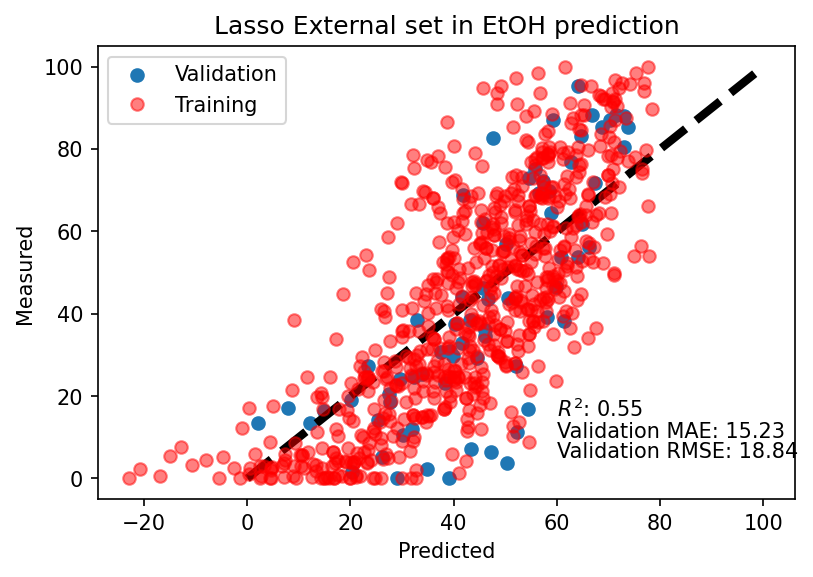

In [28]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(lasso_search.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(60,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred)))
ax.text(60,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred,ext_y)))
ax.text(60,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('Lasso External set in EtOH prediction')
plt.legend()
plt.show()

#### Top features

In [29]:
coefs=lasso_search.best_estimator_.named_steps['model'].coef_
importance=np.abs(coefs)
features=X_train.columns

<AxesSubplot:ylabel='feature'>

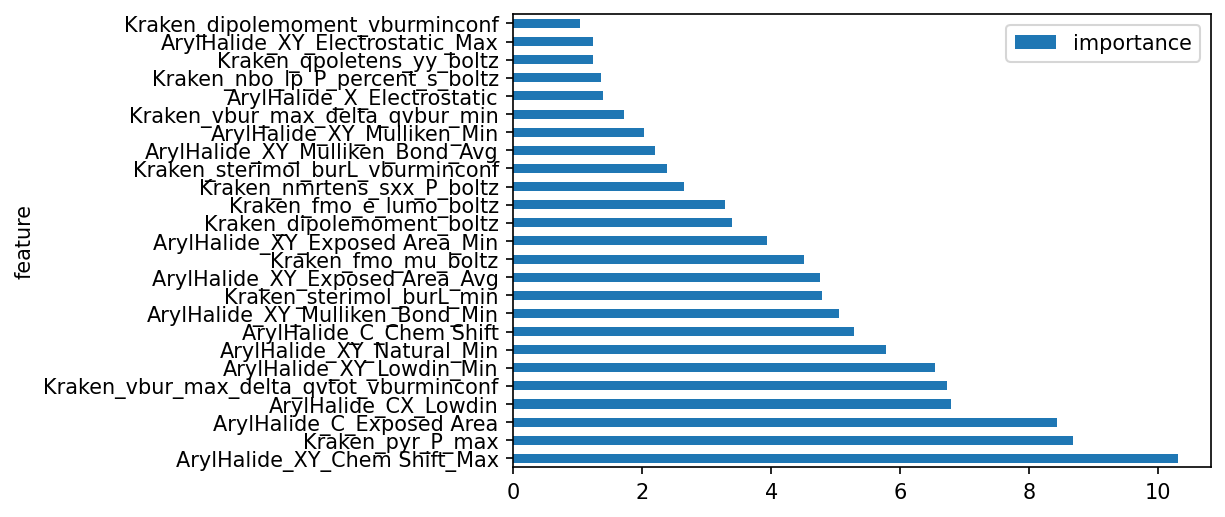

In [32]:
df=pd.DataFrame(zip(features,importance))
df2 = df.sort_values(by=[1], ascending=False).head(25)
df2.columns = ['feature', 'importance']
df2.set_index('feature',inplace=True)
df2.plot(kind='barh')

### Random Forest Regressor

In [33]:
%%time
rng = np.random.RandomState(0)
steps = [('scaler', StandardScaler()), ('Forest', RandomForestRegressor(random_state=rng))]
pipeline = Pipeline(steps)
parameters = {'Forest__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 3100, num = 100)],
              'Forest__max_features': ['auto', 'sqrt','log2',None],
              'Forest__max_depth': [int(x) for x in np.linspace(10, 210, num = 21)],
              'Forest__min_samples_split': [2, 5, 10, 15],
              'Forest__min_samples_leaf': [1, 2, 4, 10, 20],
              'Forest__bootstrap': [True, False]}

rf_random = RandomizedSearchCV(pipeline, 
                               parameters, 
                               n_iter=20, 
                               cv = 5, 
                               random_state = 422, 
                               n_jobs = -1)

rf_random.fit(X_train, Y_train)

CPU times: total: 6.22 s
Wall time: 17min 2s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('Forest',
                                              RandomForestRegressor(random_state=RandomState(MT19937) at 0x1A2224ACA40))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'Forest__bootstrap': [True, False],
                                        'Forest__max_depth': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110, 120,
                                                              130, 140, 150,
                                                              160, 170, 180,
                                                              190, 200, 210],
                                        'Forest__max_features': ['auto', 'sqrt',
                                                                 'log2', None],
                                        'Forest__min_samples_leaf': [1, 2, 4,
                                                                     10, 20],
                                        'Forest__min_samples_split': [2, 5, 10,
                                                                      15],
                                        'Forest__n_estimators': [200, 229, 258,
                                                                 287, 317, 346,
                                                                 375, 405, 434,
                                                                 463, 492, 522,
                                                                 551, 580, 610,
                                                                 639, 668, 697,
                                                                 727, 756, 785,
                                                                 815, 844, 873,
                                                                 903, 932, 961,
                                                                 990, 1020,
                                                                 1049, ...]},
                   random_state=422)

In [34]:
rf_random.best_params_

{'Forest__n_estimators': 1986,
 'Forest__min_samples_split': 10,
 'Forest__min_samples_leaf': 4,
 'Forest__max_features': 'log2',
 'Forest__max_depth': 160,
 'Forest__bootstrap': False}

In [ ]:
rf_random.best_estimator_

In [36]:
Y_Pred_rf = rf_random.best_estimator_.predict(ext_X)

In [37]:
mse_rf = mean_squared_error(ext_y, Y_Pred_rf)
print(math.sqrt(mse_rf))

19.124802137745395


#### Pair plot

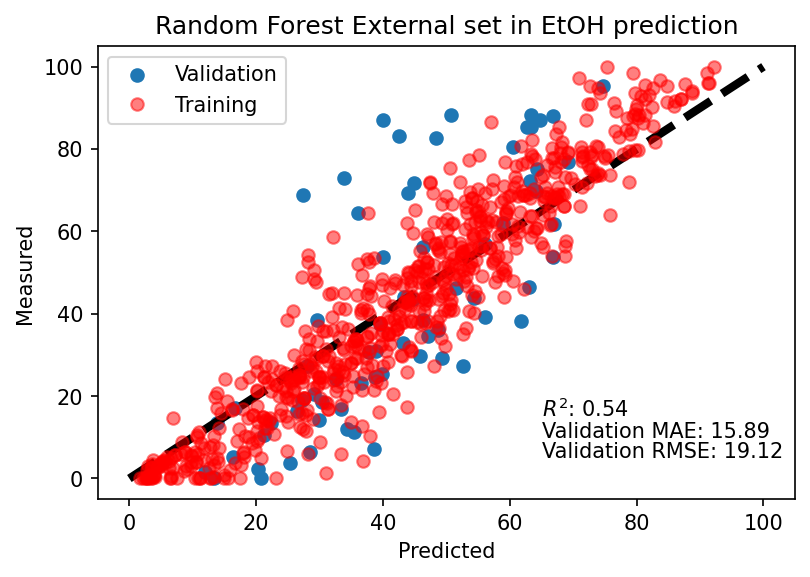

In [38]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred_rf,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(rf_random.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(65,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred_rf)))
ax.text(65,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred_rf,ext_y)))
ax.text(65,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred_rf,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('Random Forest External set in EtOH prediction')
plt.legend()
plt.show()

In [39]:
sorted_idx = rf_random.best_estimator_.named_steps["Forest"].feature_importances_.argsort()

<AxesSubplot:ylabel='feature'>

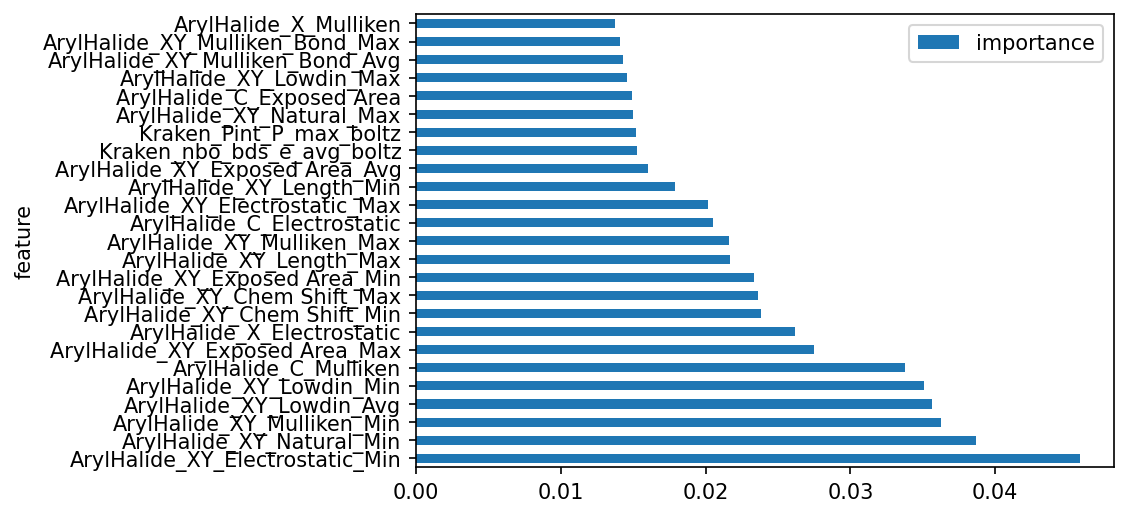

In [40]:
df_rf=pd.DataFrame(list(zip(X_train.columns[sorted_idx], 
                      rf_random.best_estimator_.named_steps["Forest"].feature_importances_[sorted_idx])))
df_rf.sort_values(by=[1], ascending=False).head(50)
df2_rf = df_rf.sort_values(by=[1], ascending=False).head(25)
df2_rf.columns = ['feature', 'importance']
df2_rf.set_index('feature',inplace=True)
df2_rf.plot(kind='barh')

### SVM

In [42]:
from sklearn.svm import SVR

In [43]:
%%time
steps_svm = [('scaler', StandardScaler()), ('model', SVR())]
pipeline_svm = Pipeline(steps_svm)
parameters_svm = {'model__C': [0.1, 1, 10, 100], 
              'model__gamma': [1,0.1,0.01,0.001],
              'model__kernel': ['rbf', 'poly', 'sigmoid']}

svm_search = GridSearchCV(pipeline_svm, 
                         parameters_svm, 
                         cv = 5, 
                         scoring="neg_mean_squared_error", 
                         verbose=3)

svm_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-997.800 total time=   0.0s
[CV 2/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-719.045 total time=   0.0s
[CV 3/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-476.618 total time=   0.0s
[CV 4/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-675.504 total time=   0.0s
[CV 5/5] END model__C=0.1, model__gamma=1, model__kernel=rbf;, score=-852.382 total time=   0.0s
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=-46020.547 total time=   4.6s
[CV 2/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=-2743.199 total time=   2.6s
[CV 3/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=-3672.719 total time=   2.7s
[CV 4/5] END model__C=0.1, model__gamma=1, model__kernel=poly;, score=-15213.749 total time=   3.3s
[CV 5/5] END model__C=0.1, model__gamma=1, model__kerne

[CV 3/5] END model__C=1, model__gamma=0.1, model__kernel=poly;, score=-2277.041 total time=   0.3s
[CV 4/5] END model__C=1, model__gamma=0.1, model__kernel=poly;, score=-11795.425 total time=   0.5s
[CV 5/5] END model__C=1, model__gamma=0.1, model__kernel=poly;, score=-670.964 total time=   0.5s
[CV 1/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-3353.739 total time=   0.0s
[CV 2/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-3267.610 total time=   0.0s
[CV 3/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-3219.198 total time=   0.0s
[CV 4/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-3254.618 total time=   0.0s
[CV 5/5] END model__C=1, model__gamma=0.1, model__kernel=sigmoid;, score=-3414.839 total time=   0.0s
[CV 1/5] END model__C=1, model__gamma=0.01, model__kernel=rbf;, score=-808.971 total time=   0.0s
[CV 2/5] END model__C=1, model__gamma=0.01, model__kernel=rbf;, score=-540.134 total time=   0.

[CV 1/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-929.045 total time=   0.0s
[CV 2/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-473.970 total time=   0.0s
[CV 3/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-515.642 total time=   0.0s
[CV 4/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-365.017 total time=   0.0s
[CV 5/5] END model__C=10, model__gamma=0.001, model__kernel=rbf;, score=-642.633 total time=   0.0s
[CV 1/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-980.885 total time=   0.0s
[CV 2/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-675.774 total time=   0.0s
[CV 3/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-467.076 total time=   0.0s
[CV 4/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-682.519 total time=   0.0s
[CV 5/5] END model__C=10, model__gamma=0.001, model__kernel=poly;, score=-821.558 total time=   

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': [1, 0.1, 0.01, 0.001],
                         'model__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [44]:
svm_search.best_params_

{'model__C': 10, 'model__gamma': 0.01, 'model__kernel': 'rbf'}

In [ ]:
svm_search.best_estimator_

In [48]:
Y_Pred_svm = svm_search.best_estimator_.predict(ext_X)

In [49]:
mse_svm = mean_squared_error(ext_y, Y_Pred_svm)
print(math.sqrt(mse_svm))

18.88862687069364


#### Pair plot

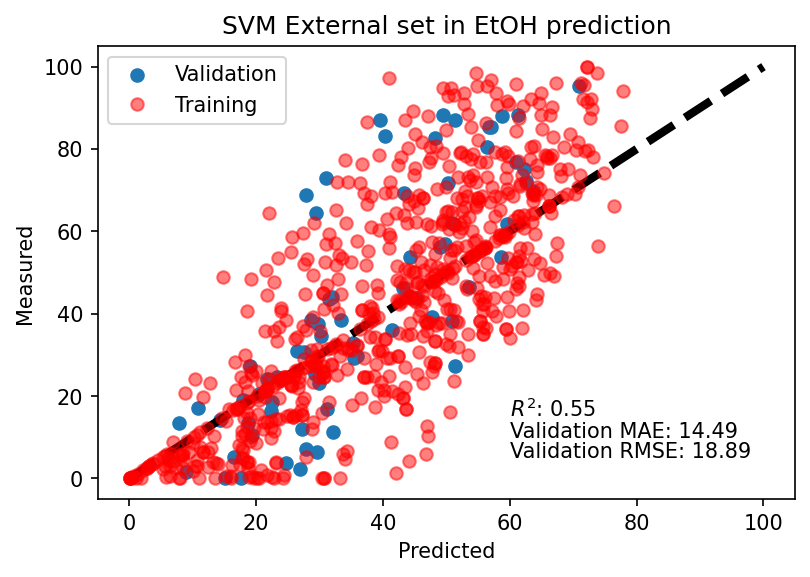

In [50]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred_svm,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(svm_search.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(60,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred_svm)))
ax.text(60,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred_svm,ext_y)))
ax.text(60,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred_svm,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('SVM External set in EtOH prediction')
plt.legend()
plt.show()

In [51]:
#For rbf importance, we will use permutation importance.  
from sklearn.inspection import permutation_importance

<AxesSubplot:ylabel='feature'>

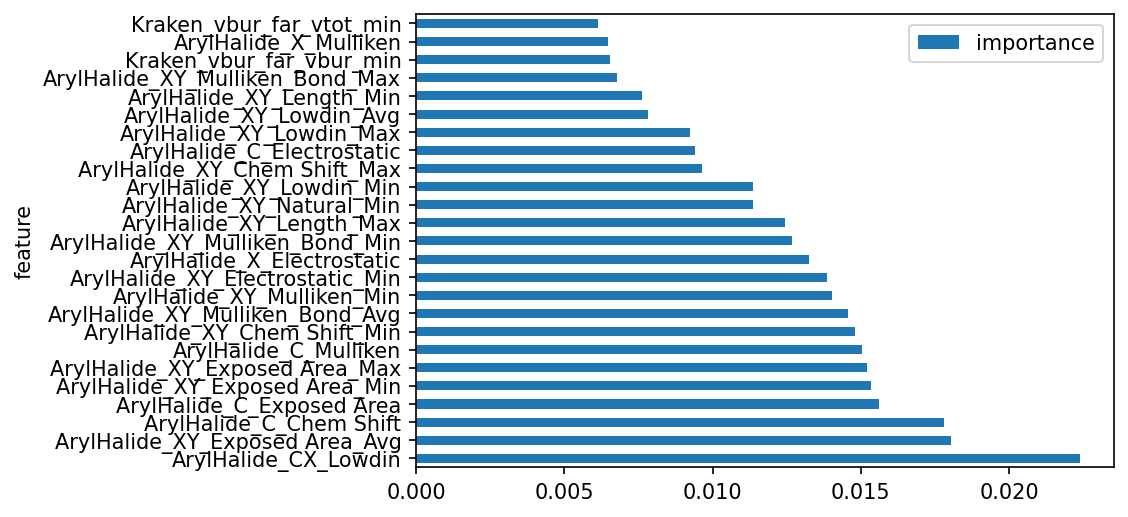

In [53]:
features=np.array(X_train.columns)
perm_importance_svm = permutation_importance(svm_search.best_estimator_, X_train, Y_train)
sorted_idx_svm = perm_importance_svm.importances_mean.argsort()

df_svm=pd.DataFrame(list(zip(X_train.columns[sorted_idx_svm], 
                      perm_importance_svm.importances_mean[sorted_idx_svm])))
df2_svm = df_svm.sort_values(by=[1], ascending=False).head(25)
df2_svm.columns = ['feature', 'importance']
df2_svm.set_index('feature',inplace=True)
df2_svm.plot(kind='barh')

### XGBOOST

In [56]:
import xgboost as xgb

In [57]:
%%time
rng = np.random.RandomState(0)
steps_xg = [('scaler', StandardScaler()),
        ('XGB', xgb.XGBRegressor(random_state=rng))] #when subsample is used
pipeline_xg = Pipeline(steps_xg)
parameters_xg = {"XGB__n_estimators": [50, 100, 250, 1000],
              "XGB__learning_rate": [0.01, 0.05, 0.1],
              "XGB__max_depth": [6],
              "XGB__colsample_bytree": [0.7],
              "XGB__min_child_weight": [5, 15],
              "XGB__subsample": [0.5]}

XGB_cv = GridSearchCV(pipeline_xg, param_grid = parameters_xg, cv = 5)
XGB_cv.fit(X_train, Y_train)

CPU times: total: 11min 10s
Wall time: 3min 51s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('XGB',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=Non...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=124102743, ...))]),
             param_grid={'XGB__colsample_bytree': [0.7],
                         'XGB__learning_rate': [0.01, 0.05, 0.1],
                         'XGB__max_depth': [6],
                         'XGB__min_child_weight': [5, 15],
                         'XGB__n_estimators': [50, 100, 250, 1000],
                         'XGB__subsample': [0.5]})

In [58]:
XGB_cv.best_params_

{'XGB__colsample_bytree': 0.7,
 'XGB__learning_rate': 0.01,
 'XGB__max_depth': 6,
 'XGB__min_child_weight': 15,
 'XGB__n_estimators': 1000,
 'XGB__subsample': 0.5}

In [ ]:
XGB_cv.best_estimator_

In [60]:
XGB_Y_Pred = XGB_cv.best_estimator_.predict(ext_X)

In [61]:
r2_score(ext_y,XGB_Y_Pred) 

0.5238705981223043

In [62]:
mse_xg = mean_squared_error(ext_y, XGB_Y_Pred)
print(math.sqrt(mse_xg))

19.379092125369134


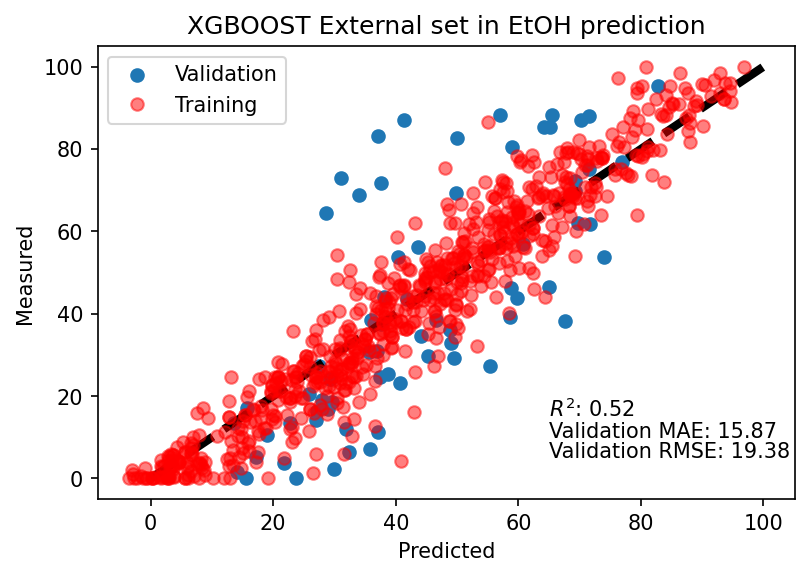

In [63]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(XGB_Y_Pred,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(XGB_cv.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(65,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,XGB_Y_Pred)))    #make sure actual first predict next!
ax.text(65,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(ext_y,XGB_Y_Pred)))
ax.text(65,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(ext_y,XGB_Y_Pred))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('XGBOOST External set in EtOH prediction')
plt.legend()
plt.show()

### Conclusion:

All the models are performing equally similar for the dataset.